<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/ML_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [58]:
# Load the dataset
chip_data = pd.read_csv("/content/chip_dataset.csv")
chip_data.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


## Data Cleaning

In [59]:
# Drop the redundant index column
chip_data = chip_data.drop(columns=["Unnamed: 0"])

# Standardize column names for consistency
chip_data.columns = chip_data.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Display basic information about the dataset, including missing values
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              4854 non-null   object 
 1   type                 4854 non-null   object 
 2   release_date         4854 non-null   object 
 3   process_size_nm      4845 non-null   float64
 4   tdp_w                4228 non-null   float64
 5   die_size_mm^2        4139 non-null   float64
 6   transistors_million  4143 non-null   float64
 7   freq_mhz             4854 non-null   float64
 8   foundry              4854 non-null   object 
 9   vendor               4854 non-null   object 
 10  fp16_gflops          536 non-null    float64
 11  fp32_gflops          1948 non-null   float64
 12  fp64_gflops          1306 non-null   float64
dtypes: float64(8), object(5)
memory usage: 493.1+ KB


In [60]:
# Calculate percentage of missing data for each column
missing_percentage = chip_data.isnull().mean() * 100

# Display columns sorted by percentage of missing data
missing_percentage.sort_values(ascending=False)

,0
fp16_gflops,88.957561
fp64_gflops,73.094355
fp32_gflops,59.868150
die_size_mm^2,14.730119
transistors_million,14.647713
tdp_w,12.896580
process_size_nm,0.185414
product,0.000000
type,0.000000
release_date,0.000000


### Dropping non-consequntial fields

In [61]:
# Drop non-consequential fields with high missing values
chip_data = chip_data.drop(columns=["fp16_gflops", "fp32_gflops", "fp64_gflops"])

# Verify the columns were dropped
print(chip_data.columns)

Index(['product', 'type', 'release_date', 'process_size_nm', 'tdp_w',
       'die_size_mm^2', 'transistors_million', 'freq_mhz', 'foundry',
       'vendor'],
      dtype='object')


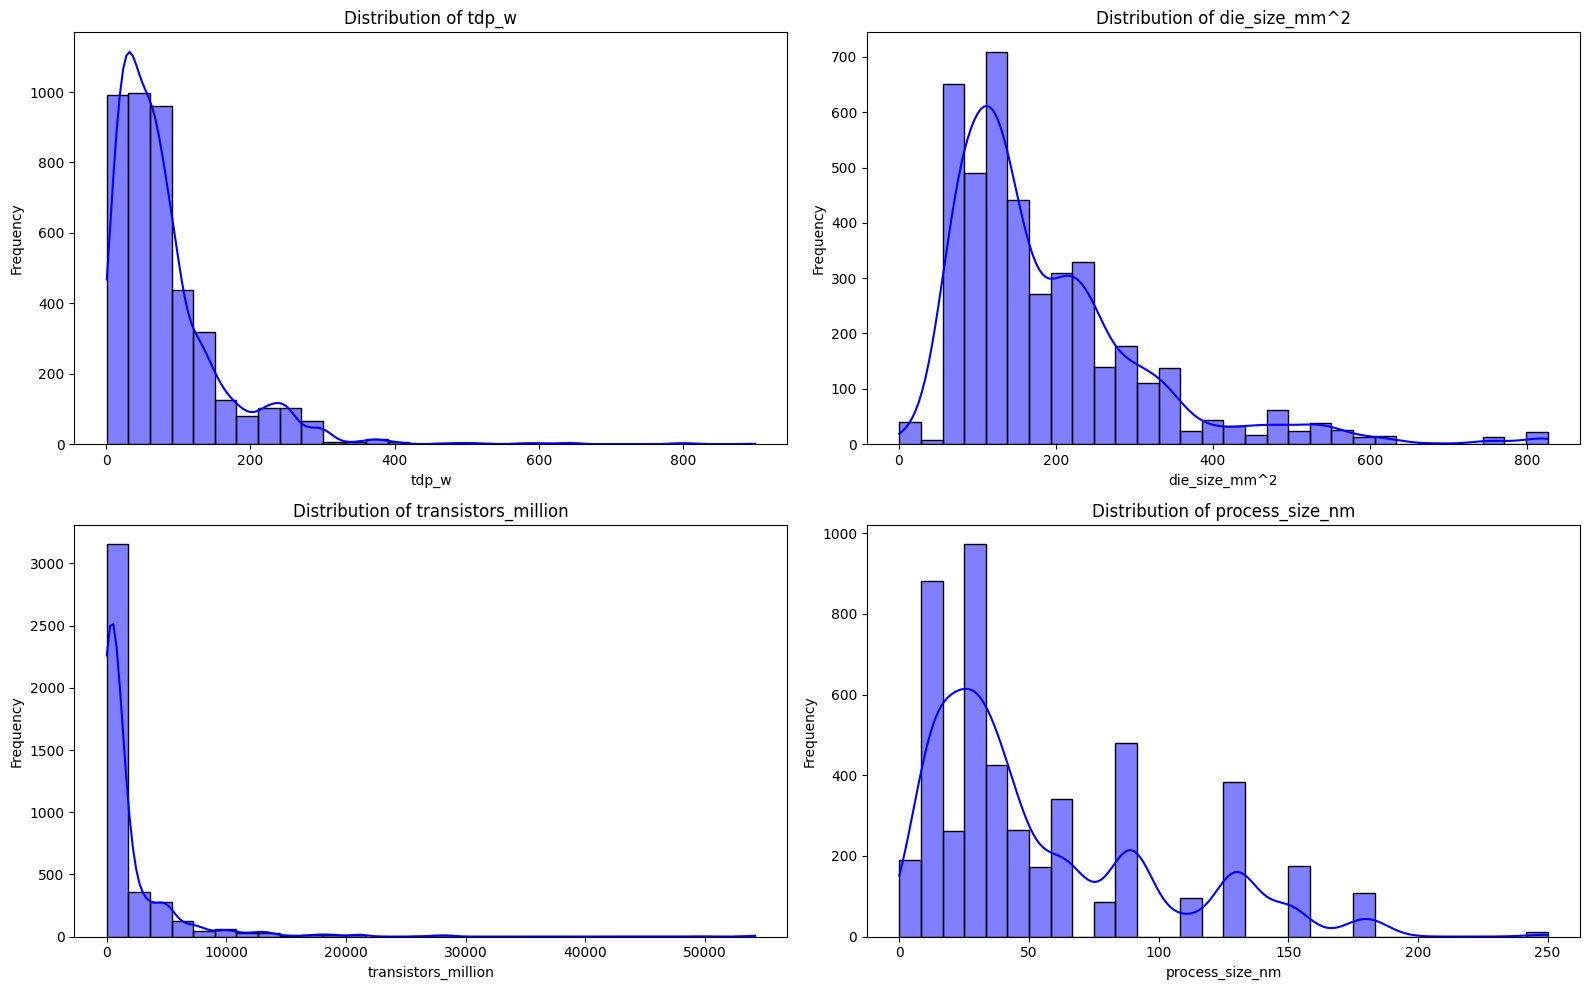

In [62]:
# Visualize the distributions of columns with missing values
columns_to_plot = ['tdp_w', 'die_size_mm^2', 'transistors_million', 'process_size_nm']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for col, ax in zip(columns_to_plot, axes.flatten()):
    sns.histplot(chip_data[col], kde=True, ax=ax, color='blue', bins=30)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### imputation by median

In [64]:
# List of numeric columns for imputation
numeric_columns = ['process_size_nm', 'tdp_w', 'die_size_mm^2', 'transistors_million']

# Perform median imputation
for column in numeric_columns:
    median_value = chip_data[column].median()
    chip_data[column].fillna(median_value, inplace=True)
    # print(f"{column}: Imputed missing values with median = {median_value}")

<ipython-input-64-6fa889412c14>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chip_data[column].fillna(median_value, inplace=True)


In [65]:
#check missing values
chip_data.isnull().sum()

,0
product,0
type,0
release_date,0
process_size_nm,0
tdp_w,0
die_size_mm^2,0
transistors_million,0
freq_mhz,0
foundry,0
vendor,0


### Transforming release_date to the corrrect format (date time)

In [66]:
# Convert `release_date` to datetime format
chip_data['release_date'] = pd.to_datetime(chip_data['release_date'], errors='coerce')

# Summary of invalid date conversions (if any)
invalid_dates = chip_data['release_date'].isnull().sum()

# Output the number of invalid dates, and display any rows with invalid dates
print(f"Number of invalid release_date values: {invalid_dates}")
print("\nRows with invalid release_date:")
print(chip_data[chip_data['release_date'].isnull()])

# Perform forward fill to fill missing release_date values
chip_data['release_date'].fillna(method='ffill', inplace=True)

# Display the updated data with filled values for release_date
print("\nData after filling missing release_date values with forward fill:")
print(chip_data[['product', 'release_date']].head(10))  # Displaying the first 10 rows as an example


Number of invalid release_date values: 75

Rows with invalid release_date:
                        product type release_date  process_size_nm  tdp_w  \
68         Intel Core i7-9850HE  CPU          NaT             14.0   45.0   
1558       Intel Core i7-9850HL  CPU          NaT             14.0   25.0   
2026      Intel Core i9-10990XE  CPU          NaT             14.0  380.0   
2221     NVIDIA Jetson Nano GPU  GPU          NaT             20.0   10.0   
2237          3dfx Spectre 1000  GPU          NaT            180.0   30.0   
...                         ...  ...          ...              ...    ...   
4737           Intel Xe DG1 OEM  GPU          NaT             10.0   30.0   
4798  NVIDIA Quadro T400 Mobile  GPU          NaT             12.0   18.0   
4810      AMD Radeon Pro V7300X  GPU          NaT             14.0  130.0   
4820         AMD FirePro W4130M  GPU          NaT             28.0   65.0   
4833        AMD Radeon R9 280X2  GPU          NaT             28.0  375.0   



<ipython-input-66-ecf5308f7e67>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chip_data['release_date'].fillna(method='ffill', inplace=True)
<ipython-input-66-ecf5308f7e67>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chip_data['release_date'].fillna(method='ffill', inplace=True)


In [67]:
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product              4854 non-null   object        
 1   type                 4854 non-null   object        
 2   release_date         4854 non-null   datetime64[ns]
 3   process_size_nm      4854 non-null   float64       
 4   tdp_w                4854 non-null   float64       
 5   die_size_mm^2        4854 non-null   float64       
 6   transistors_million  4854 non-null   float64       
 7   freq_mhz             4854 non-null   float64       
 8   foundry              4854 non-null   object        
 9   vendor               4854 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 379.3+ KB


In [50]:
# Check unique values for each categorical column
type_categories = chip_data['type'].unique()
vendor_categories = chip_data['vendor'].unique()
foundry_categories = chip_data['foundry'].unique()
product_categories = chip_data['product'].unique()

# Display the unique categories for each column
print("Unique categories in 'type':", type_categories)
print("Unique categories in 'vendor':", vendor_categories)
print("Unique categories in 'foundry':", foundry_categories)
print("Unique categories in 'product':", product_categories)

Unique categories in 'type': ['CPU' 'GPU']
Unique categories in 'vendor': ['AMD' 'Intel' 'Other' 'NVIDIA' 'ATI']
Unique categories in 'foundry': ['Unknown' 'Intel' 'GF' 'TSMC' 'UMC' 'Samsung' 'Renesas' 'Sony' 'NEC'
 'IBM']
Unique categories in 'product': ['AMD Athlon 64 3500+' 'AMD Athlon 200GE' 'Intel Core i5-1145G7' ...
 'NVIDIA GeForce FX Go5100' 'NVIDIA Quadro 3000M' 'NVIDIA GeForce 9300 SE']


### Converting categorical variables into numeric values for machine learning models.

#### Encoding techniques:

- Label Encoding: Assign a unique integer to each category in a column.
- One-Hot Encoding: Create a binary column for each category.

Given the nature of the dataset:

1. type:
- Categories: ['CPU', 'GPU']
- Encoding Strategy: Since there are only two categories, Label Encoding is appropriate. You can assign 0 to 'CPU' and 1 to 'GPU'.
2. vendor:
- Categories: ['AMD', 'Intel', 'Other', 'NVIDIA', 'ATI']
- Encoding Strategy: Since there are multiple unique categories, One-Hot Encoding is the best choice. This will create a binary column for each vendor.
3. foundry:
- Categories: ['Unknown', 'Intel', 'GF', 'TSMC', 'UMC', 'Samsung', 'Renesas', 'Sony', 'NEC', 'IBM']
- Encoding Strategy: With a larger number of categories, One-Hot Encoding is appropriate. This will create a binary column for each foundry.


In [54]:
# Create a new column for the year of release for analysis purposes
chip_data['release_year'] = chip_data['release_date'].dt.year

# Check the data types and ensure necessary columns are correctly formatted
chip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product              4854 non-null   object        
 1   type                 4854 non-null   int64         
 2   release_date         4854 non-null   datetime64[ns]
 3   process_size_nm      4854 non-null   float64       
 4   tdp_w                4854 non-null   float64       
 5   die_size_mm^2        4854 non-null   float64       
 6   transistors_million  4854 non-null   float64       
 7   freq_mhz             4854 non-null   float64       
 8   vendor_ATI           4854 non-null   bool          
 9   vendor_Intel         4854 non-null   bool          
 10  vendor_NVIDIA        4854 non-null   bool          
 11  vendor_Other         4854 non-null   bool          
 12  foundry_IBM          4854 non-null   bool          
 13  foundry_Intel        4854 non-nul

##  Exploratory Data Analysis (EDA)

### a. Moore's Law (Doubling of Transistor Density)

Moore's Law states that the number of transistors in a microchip doubles approximately every 2 years.

- Hypothesis: Transistor count increases significantly over time (indicating Moore's Law).

- visualize transistors_million against release_date and check for exponential growth in transistor counts over time, especially for GPUs.

In [69]:
# Prepare data for Moore's Law analysis (transistor count over time)
chip_data_moores = chip_data[['release_date', 'transistors_million', 'type']].copy()
chip_data_moores['year'] = chip_data_moores['release_date'].dt.year

# Group by year and type (CPU/GPU) for median transistor count
moores_trend = chip_data_moores.groupby(['year', 'type']).median().reset_index()

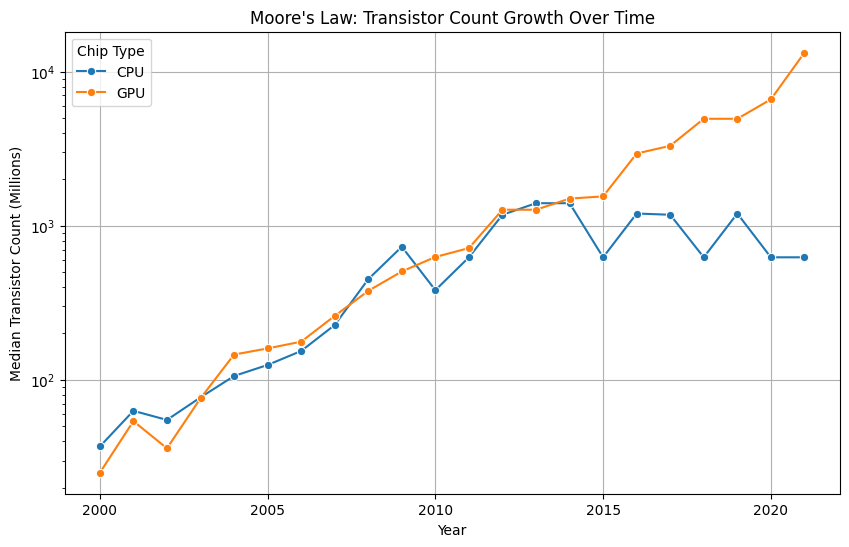

In [70]:
# Visualize Moore's Law: Transistor count over time for CPUs and GPUs
plt.figure(figsize=(10, 6))
sns.lineplot(data=moores_trend, x='year', y='transistors_million', hue='type', marker='o')
plt.title('Moore\'s Law: Transistor Count Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Median Transistor Count (Millions)')
plt.legend(title='Chip Type')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.grid(True)
plt.show()


### b. Dennard Scaling (Power vs. Size)
**Dennard Scaling** states that as transistors get smaller, their power density remains constant, so power consumption per unit area decreases proportionally. This allows clock speeds to increase without additional power consumption, theoretically improving performance without raising power use.

- Hypothesis: As process_size_nm decreases, tdp_w and die_size_mm^2 (power and size) should not increase drastically for similar performance.

- analyze the relationship between:

Process Size (nm) vs. Frequency (MHz): Clock speeds should increase as process size decreases.

Process Size (nm) vs. TDP (W): Power density should remain stable or decrease as transistors shrink.

Die Size trends can also offer insights into performance scaling.

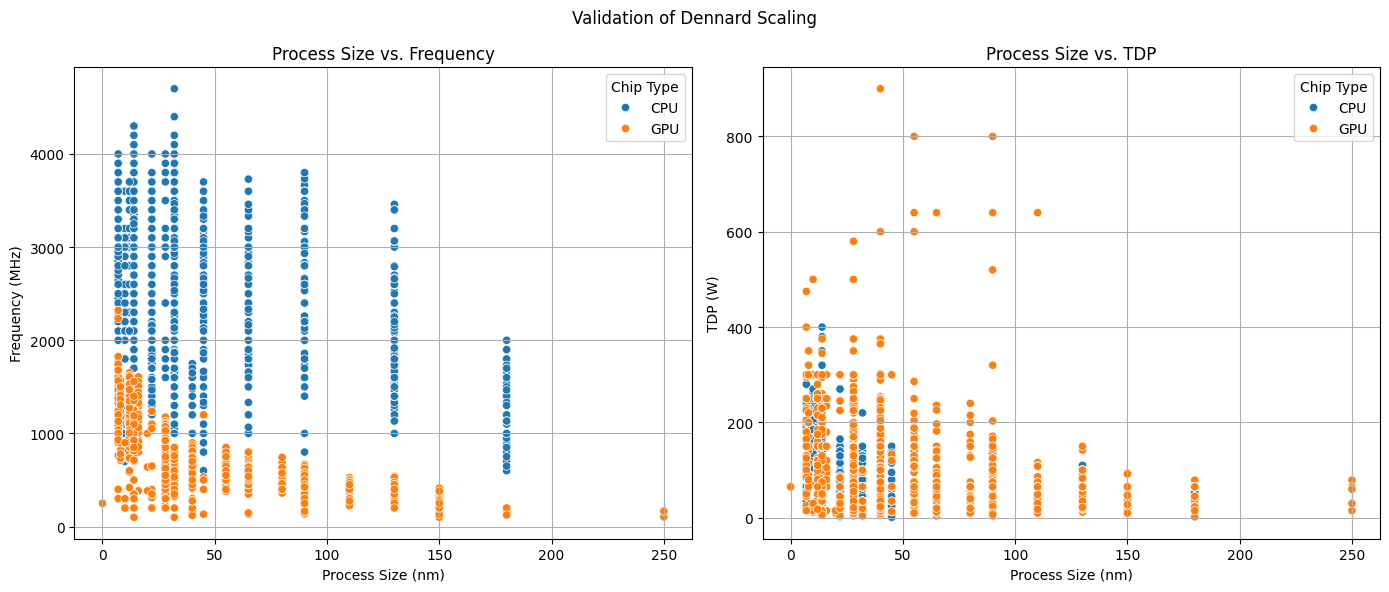

In [72]:
# Create scatter plots to validate Dennard Scaling
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Process Size vs Frequency
sns.scatterplot(data=chip_data, x='process_size_nm', y='freq_mhz', hue='type', ax=ax[0])
ax[0].set_title('Process Size vs. Frequency')
ax[0].set_xlabel('Process Size (nm)')
ax[0].set_ylabel('Frequency (MHz)')
ax[0].legend(title='Chip Type')
ax[0].grid(True)

# Process Size vs TDP
sns.scatterplot(data=chip_data, x='process_size_nm', y='tdp_w', hue='type', ax=ax[1])
ax[1].set_title('Process Size vs. TDP')
ax[1].set_xlabel('Process Size (nm)')
ax[1].set_ylabel('TDP (W)')
ax[1].legend(title='Chip Type')
ax[1].grid(True)

plt.suptitle('Validation of Dennard Scaling')
plt.tight_layout()
plt.show()

### **Insights from the Plots:**
**1. Process Size vs. Frequency (Left Plot):**

- As the process size decreases, frequency generally increases, supporting Dennard Scaling's premise of performance improvement with transistor shrinkage.
However, the trend shows variability, suggesting that the increase in frequency may be slowing in recent years.

**2. Process Size vs. TDP (Right Plot):**

- While smaller process sizes were expected to reduce power density, TDP (Thermal Design Power) does not decrease proportionally. This indicates that modern chips may consume more power due to increased transistor density and performance demands.
- There's a plateau or slight increase in TDP for newer chips, hinting at the breakdown of Dennard Scaling in modern semiconductor processes.

**Conclusion:**

Dennard Scaling held true in earlier years but appears to be less valid in recent times. While frequencies have increased with smaller transistors, power density has not decreased as expected, possibly due to higher transistor counts and performance requirements.

### c. CPUs Have Higher Frequencies, but GPUs are Catching Up
- Hypothesis: CPUs generally have higher clock speeds (frequency in MHz) than GPUs, but over time, GPU frequencies are increasing and approaching CPU frequencies.

- Compare the frequency trends for CPUs and GPUs over time.
- Visualize how the frequencies of both types of chips have evolved, focusing on whether GPUs are closing the frequency gap with CPUs.

In [73]:
# Extract year from release date
chip_data['year'] = chip_data['release_date'].dt.year

# Group by year and type, calculate median frequency
freq_trend = chip_data.groupby(['year', 'type'])['freq_mhz'].median().reset_index()

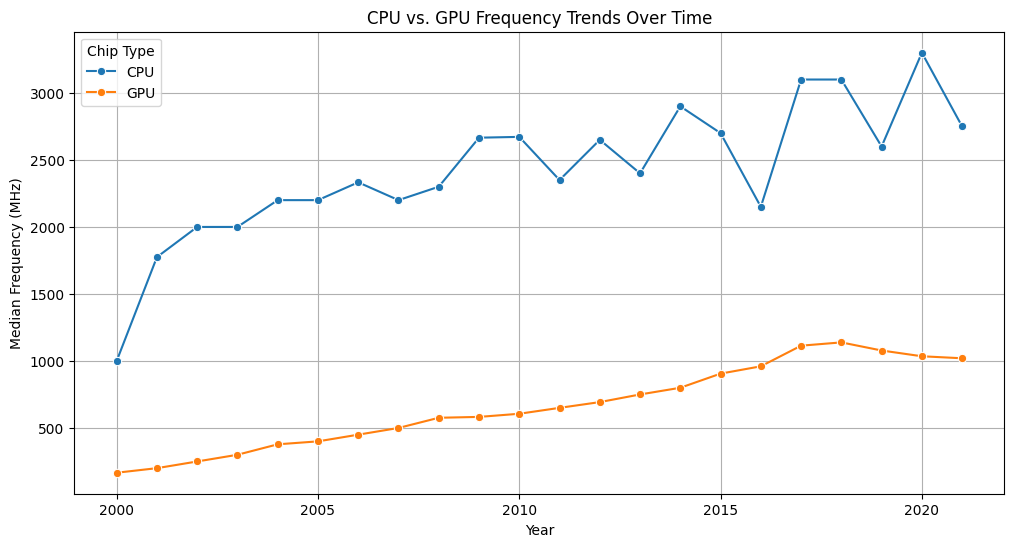

In [74]:
# Create a line plot to compare CPU and GPU frequency trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=freq_trend, x='year', y='freq_mhz', hue='type', marker='o')
plt.title('CPU vs. GPU Frequency Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Median Frequency (MHz)')
plt.legend(title='Chip Type')
plt.grid(True)
plt.show()


###**Insights from the Plot:**
- **CPUs have consistently higher frequencies** compared to GPUs.
- However, **GPU frequencies are gradually increasing**, especially in recent years.
- The gap between CPU and GPU frequencies has **narrowed**, indicating that GPUs are indeed catching up, although they still generally operate at lower clock speeds than CPUs.
This trend aligns with the need for higher GPU performance in applications like gaming, AI, and parallel processing.

### d. GPU Performance Doubles Every 1.5 Years
To validate the claim that GPU performance doubles every 1.5 years, we need to examine:

1. Performance Metrics: Since "performance" isn't directly given, we'll use transistor count as a proxy. Transistor count correlates strongly with GPU computational power.
2. Trend Analysis: Check if transistor counts follow an exponential growth pattern, doubling approximately every 1.5 years.

In [32]:
# Extract the year from the release_date
chip_data['release_year'] = chip_data['release_date'].dt.year

# Filter only the GPUs
gpu_data = chip_data[chip_data['type'] == 'GPU']

# Display the first few rows of the performance score with release_year
print(gpu_data[['product', 'release_year', 'performance_score']].head())


                         product  release_year  performance_score
2192          Intel Xeon E3-1275          2011         25056000.0
2193      Matrox Parhelia 128 MB          2002          2784000.0
2194  NVIDIA GeForce MX150 GP107          2019        639896400.0
2195               Intel GMA 500          2008         18470400.0
2196      ATI Radeon HD 4350 AGP          2008         10599600.0


In [37]:
from sklearn.linear_model import LinearRegression

# Extract GPUs and relevant columns
gpu_data = data[data['Type'] == 'GPU'][['Release Year', 'Transistors (million)']].dropna()

# Sort by release year
gpu_data = gpu_data.sort_values(by='Release Year')

# Apply log transformation to fit exponential growth
gpu_data['Log Transistors'] = np.log2(gpu_data['Transistors (million)'])

# Fit linear model to log-transformed data
X = gpu_data[['Release Year']]
y = gpu_data['Log Transistors']
model = LinearRegression()
model.fit(X, y)

# Predict values for the line of best fit
gpu_data['Fitted Log Transistors'] = model.predict(X)

# Plot original data and fitted line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='Log Transistors', data=gpu_data, label='GPU Data')
plt.plot(gpu_data['Release Year'], gpu_data['Fitted Log Transistors'], color='red', label='Trend Line')
plt.title('GPU Transistor Count Doubling Trend')
plt.xlabel('Release Year')
plt.ylabel('Log2(Transistor Count)')
plt.legend()
plt.show()

NameError: name 'data' is not defined

      release_year  performance_score  performance_log  log_growth_rate
3101          2000           183040.0        12.117460              NaN
2472          2000           510600.0        13.143342         1.025882
3935          2000           440000.0        12.994530        -0.148812
3682          2000           552780.0        13.222715         0.228185
3164          2000         11681280.0        16.273498         3.050783


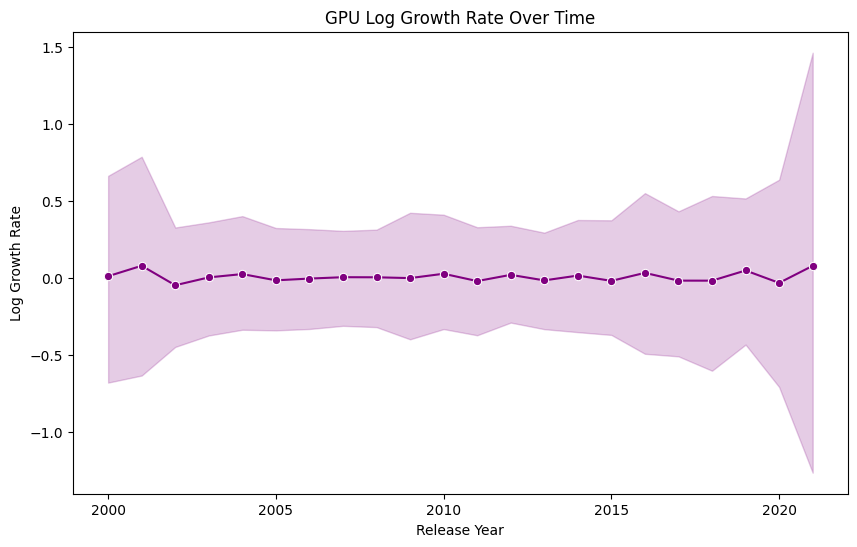

In [35]:
import numpy as np

# Calculate the log growth rate of performance scores
gpu_data = gpu_data.sort_values('release_year')
gpu_data['performance_log'] = np.log(gpu_data['performance_score'])

# Calculate the yearly difference in log performance score
gpu_data['log_growth_rate'] = gpu_data['performance_log'].diff()

# Display the log growth rate
print(gpu_data[['release_year', 'performance_score', 'performance_log', 'log_growth_rate']].head())

# Plot the log growth rate to check for consistency
plt.figure(figsize=(10, 6))
sns.lineplot(data=gpu_data, x='release_year', y='log_growth_rate', marker="o", color='purple')
plt.title("GPU Log Growth Rate Over Time")
plt.xlabel("Release Year")
plt.ylabel("Log Growth Rate")
plt.show()

### e. GPU Performance Improvement is a Joint Effect of Smaller Transistors, Larger Die Size, and Higher Frequency
- Hypothesis: transistors_million, die_size_mm^2, and freq_mhz should all show a positive relationship with each other for GPU chips over time.

- perform a correlation analysis between these features for GPUs only.

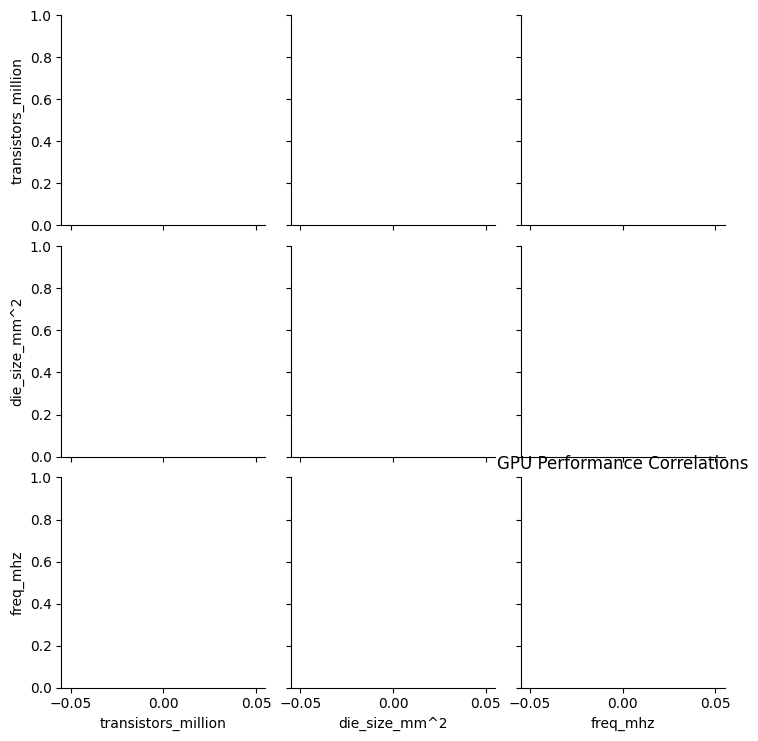

In [ ]:
# 5. GPU Performance vs Transistors, Die Size, Frequency
sns.pairplot(gpu_data[['transistors_million', 'die_size_mm^2', 'freq_mhz']])
plt.title("GPU Performance Correlations")
plt.show()

### f. High-end GPUs Tend to Use New Semiconductor Technologies First, Low-end GPUs Use Old Technologies
- Hypothesis: High-end GPUs tend to use smaller process_size_nm first, while low-end GPUs use larger process sizes for longer periods.

- analyze the process_size_nm by type and vendor, specifically looking for patterns in the release of high vs low-end GPUs.

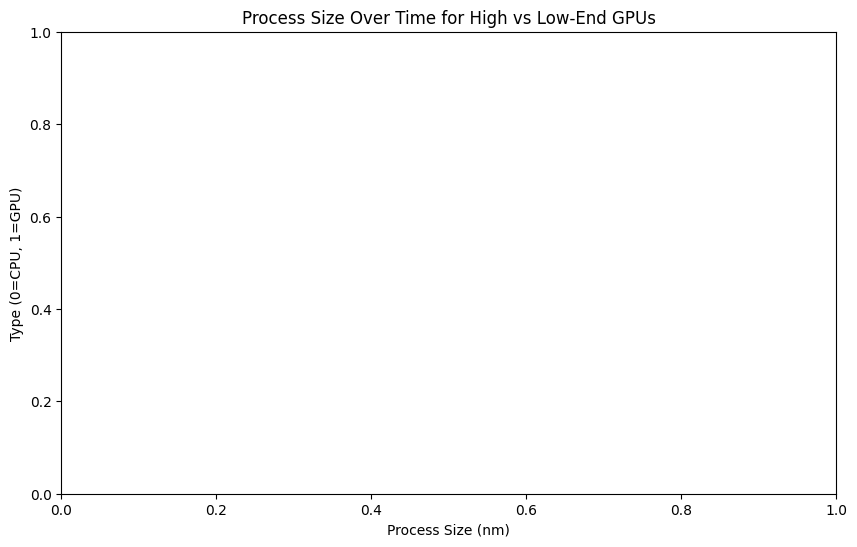

In [ ]:
#6 High-end GPUs use new technologies first
plt.figure(figsize=(10, 6))
sns.boxplot(data=gpu_data, x='process_size_nm', y='type')
plt.title("Process Size Over Time for High vs Low-End GPUs")
plt.xlabel("Process Size (nm)")
plt.ylabel("Type (0=CPU, 1=GPU)")
plt.show()

### g. Process Size for Intel, AMD, and Nvidia is Lower Compared to ATI and Other Vendors
- Hypothesis: Intel, AMD, and Nvidia chips should have smaller process_size_nm compared to ATI and other vendors.

- compare process_size_nm across vendor categories.

In [ ]:
# 7. Comparison of Process Size by Vendor
plt.figure(figsize=(10, 6))
sns.boxplot(data=chip_data, x='vendor_AMD', y='process_size_nm')
plt.title("Process Size by Vendor (AMD)")
plt.xlabel("Vendor")
plt.ylabel("Process Size (nm)")
plt.show()

ValueError: Could not interpret value `vendor_AMD` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### h. TSMC Makes the Highest Number of Chips in the World
- Hypothesis: TSMC is likely the most frequent foundry used for manufacturing chips.

- analyze the frequency of foundry values and verify if TSMC is the most common foundry.

In [ ]:
# 8. Frequency of TSMC foundry
foundry_counts = chip_data['foundry_TSMC'].sum()
print(f"Number of chips made by TSMC: {foundry_counts}")

Number of chips made by TSMC: 2178
